In [67]:
from lib import *

In [68]:
from mnist import MNIST
mndata = MNIST('./mnist')
images, labels = mndata.load_training()

In [69]:
import numpy as np

In [70]:
x = np.array(images)

In [71]:
y = np.array(labels)

In [72]:
x.shape

(60000, 784)

In [73]:
def one_hot_encoded(y, num_class):
    n = y.shape[0]
    onehot = np.zeros((n, num_class), dtype="int32")
    for i in range(n):
        idx = y[i]
        onehot[i][idx] = 1
    return onehot

y = one_hot_encoded(y, 10)

In [74]:
net = models.Model()

net.add_layer(layers.linear.LinearLayer((784, 100), b_initial=0, w_init='xavier_uniform'))
net.add_layer(layers.activations.ReLU((100, 100)))
net.add_layer(layers.linear.LinearLayer((100, 10) , b_initial=0, w_init='xavier_uniform'))
net.add_layer(layers.activations.Softmax((10, 10)))
net.set_loss(layers.loss.CrossEntropy((10, 1)))
net.build()

optimizer = train.GradientDecent()

optimizer.train(net, x, y, eta=0.001, eps=0.00005, max_iter=2000)

/home/denissimo/Repo/big-torch/src/big_torch/layers/loss.py:18: RuntimeWarning: divide by zero encountered in log
  losses = - np.log(y_hat)


Epoch 1 - loss: inf
Epoch 2 - loss: inf


/home/denissimo/Repo/big-torch/src/big_torch/train/gradient_based.py:24: RuntimeWarning: invalid value encountered in double_scalars
  _eps = abs(prev_l0 - l0) if prev_l0 != None else 2*eps


Epoch 3 - loss: inf
Epoch 4 - loss: inf
Epoch 5 - loss: 6.619452520832119
Epoch 6 - loss: 2.3371477051135523
Epoch 7 - loss: 1.4497087951883665
Epoch 8 - loss: 1.1473749086173486
Epoch 9 - loss: 1.0400341013481738
Epoch 10 - loss: 0.9653243966867039
Epoch 11 - loss: 0.9069773434864231
Epoch 12 - loss: 0.8585738992530099
Epoch 13 - loss: 0.8171005162224404
Epoch 14 - loss: 0.7808330670197916
Epoch 15 - loss: 0.748572500974946
Epoch 16 - loss: 0.7197194474531886
Epoch 17 - loss: 0.6936988449078298
Epoch 18 - loss: 0.6698881275864386
Epoch 19 - loss: 0.6479860898816301
Epoch 20 - loss: 0.6277704820215486
Epoch 21 - loss: 0.6090394101630937
Epoch 22 - loss: 0.5914857195288976
Epoch 23 - loss: 0.5751077231324613


KeyboardInterrupt: 

In [ ]:
obj = 1233

In [ ]:
net.predict(np.array([x[obj]]))


array([[1.80465887e-01, 5.15557310e-02, 8.24054754e-02, 1.15667174e-01,
        1.57022690e-06, 5.55023067e-02, 5.10312281e-01, 4.01268420e-03,
        7.01789126e-05, 6.71061631e-06]])

In [ ]:
import matplotlib.pyplot as plt 

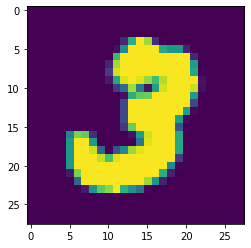

In [ ]:
plt.imshow(x[obj].reshape((28,28)))

In [ ]:
y[obj]

array([0, 0, 0, 1, 0, 0, 0, 0, 0, 0], dtype=int32)